In [9]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Nadam
from training_functions import plot_training

# Method #1 Using false positive flags for training

In [10]:
learning_data = pd.read_csv('data/learning_data.csv')

In [11]:
# Select only the columns with false positive flags for the training data
flags_exoplanet_data = learning_data[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec']]
flags_exoplanet_labels = learning_data['koi_disposition'].replace({
    'FALSE POSITIVE':0,
    'CONFIRMED':1
}).to_frame() 

print(flags_exoplanet_data.shape, flags_exoplanet_labels.shape)

(5304, 4) (5304, 1)


In [12]:
display(flags_exoplanet_data)
display(flags_exoplanet_labels)

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
0,0,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
5299,0,1,0,0
5300,0,0,0,1
5301,0,1,1,0
5302,0,0,1,0


,koi_disposition
0,1
1,0
2,0
3,1
4,1
...,...
5299,0
5300,0
5301,0
5302,0


In [13]:
# Split the data into training and validation sets
training_data, validation_data, \
training_labels, validation_labels = train_test_split(
    flags_exoplanet_data,
    flags_exoplanet_labels,
    random_state=546
)

print(training_data.shape)
print(training_labels.shape)
print(validation_data.shape)
print(validation_labels.shape)

(3978, 4)
(3978, 1)
(1326, 4)
(1326, 1)


In [ ]:
# build and compile the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu',input_dim=4),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = Adam(learning_rate=.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])



In [ ]:
history = model.fit(
    training_data,
    training_labels,
    validation_data = (validation_data, validation_labels),
    epochs=100,
    batch_size=100)

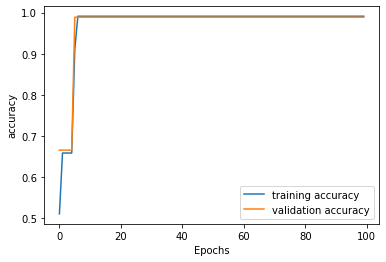

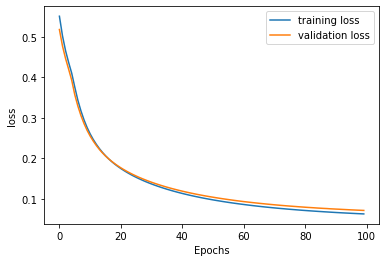

In [16]:
plot_training(history, 'accuracy')
plot_training(history, 'loss')